In [0]:
#mount the drive where we have the downloaded trained weights
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#download the modules
#tensorflow-gpu==1.6.0 and keras==2.2.0
#!pip install tensorflow==1.15.0
#!pip install tensorflow==1.13.1
#!pip install tensorflow-gpu==1.6.0
!git clone https://github.com/matterport/Mask_RCNN.git
!git clone https://github.com/philferriere/cocoapi.git
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
!pip install mrcnn
!git clone https://github.com/nitsourish/car-damage-detection-using-CNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 116.75 MiB | 10.54 MiB/s, done.
Resolving deltas: 100% (567/567), done.
Cloning into 'cocoapi'...
remote: Enumerating objects: 994, done.
remote: Total 994 (delta 0), reused 0 (delta 0), pack-reused 994
Receiving objects: 100% (994/994), 12.26 MiB | 5.53 MiB/s, done.
Resolving deltas: 100% (589/589), done.
  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-req-build-_04f0r_w
  Running command git clone -q https://github.com/philferriere/cocoapi.git /tmp/pip-req-build-_04f0r_w
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275328 sha256=eff1ca611dd6ff4bcfdfc0a7797b57b7df1eacbed84dbb18ec5b20dcd0baf413
  Stored in directory: /tmp/pip-ephem-wheel-cache-zkuwtd64/wheels/69/2b/12/2fa959e49f73d26cff202c2f4e5079096c9c57c8a8509fd75c
Successfully built pycocotools
     |███

In [0]:
%tensorflow_version 1.13.1
#!pip install keras==2.1.6
#!pip install keras==2.2.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.13.1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:

!unzip -q /content/car-damage-detection-using-CNN/custom.zip -d /content/car-damage-detection-using-CNN/

In [0]:
import os
os.rename("/content/car-damage-detection-using-CNN/custom","/content/car-damage-detection-using-CNN/images")

In [0]:
#cuda problems
#https://medium.com/@nickzamosenchuk/training-the-model-for-ios-coreml-in-google-colab-60-times-faster-6b3d1669fc46
#https://stackoverflow.com/questions/54172462/tensorflow-wont-import-in-colab


"""
# Remove CUDA 9 completely
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

# Install CUDA 8
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!dpkg -i --force-overwrite cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!apt-get update
!apt-get install cuda-8-0
# install will fail, need to force dpkg to overwrite the configuration file
!wget http://archive.ubuntu.com/ubuntu/pool/main/m/mesa/libglx-mesa0_18.0.5-0ubuntu0~18.04.1_amd64.deb
!dpkg -i --force-overwrite libglx-mesa0_18.0.5-0ubuntu0~18.04.1_amd64.deb
!wget http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/nvidia-410_410.48-0ubuntu1_amd64.deb
!dpkg -i --force-overwrite nvidia-410_410.48-0ubuntu1_amd64.deb
!apt --fix-broken install
!apt-get install cuda-8-0

!pip install turicreate
# The worng version of MXNET will be installed.
!pip uninstall -y mxnet
# Instal CUDA8-compatible version of mxnet 1.1.0
!pip install mxnet-cu80==1.1.0
"""


"\n# Remove CUDA 9 completely\n!apt-get --purge remove cuda nvidia* libnvidia-*\n!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge\n!apt-get remove cuda-*\n!apt autoremove\n!apt-get update\n\n# Install CUDA 8\n!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb\n!dpkg -i --force-overwrite cuda-repo-ubuntu1604_8.0.61-1_amd64.deb\n!apt-get update\n!apt-get install cuda-8-0\n# install will fail, need to force dpkg to overwrite the configuration file\n!wget http://archive.ubuntu.com/ubuntu/pool/main/m/mesa/libglx-mesa0_18.0.5-0ubuntu0~18.04.1_amd64.deb\n!dpkg -i --force-overwrite libglx-mesa0_18.0.5-0ubuntu0~18.04.1_amd64.deb\n!wget http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/nvidia-410_410.48-0ubuntu1_amd64.deb\n!dpkg -i --force-overwrite nvidia-410_410.48-0ubuntu1_amd64.deb\n!apt --fix-broken install\n!apt-get install cuda-8-0\n\n!pip install turicreate\n# The worng version 

In [0]:

import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")
#ROOT_DIR = os.path.abspath("../")


# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [0]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Import Mask RCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model
import mrcnn.model as modellib
from mrcnn.model import log
import cv2
#import custom,custom_1
import imgaug,h5py,IPython

%matplotlib inline

In [0]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
%matplotlib inline
from os import listdir
from xml.etree import ElementTree

In [0]:
class CustomConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "scratch"

    # We use a GPU with 6GB memory, which can fit only one image.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Car Background + Scratch

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

In [0]:
# Root directory of the project
#ROOT_DIR = os.getcwd()
ROOT_DIR ="/content/Mask_RCNN"

sys.path.append(ROOT_DIR)  # To find local version of the library
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
custom_WEIGHTS_PATH = "mask_rcnn_coco.h5"  # TODO: update this path for best performing iteration weights
config = CustomConfig()
#custom_DIR = os.path.join(ROOT_DIR, "custom/")
custom_DIR="/content/car-damage-detection-using-CNN/images/"

In [0]:
class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):
        """Load a subset of the dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("scratch", 1, "scratch")

        # Train or validation dataset?
        assert subset in ["train", "val"]
        loading_dir = os.path.join(dataset_dir,subset)

        # Load annotations
        # VGG Image Annotator saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region
        annotations1 = json.load(open(os.path.join(loading_dir,"via_region_data.json"),'r',encoding="utf8",errors='ignore'))
        # print(annotations1)
        annotations = list(annotations1.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]

        # Add images
        for a in annotations:
            # print(a)
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. There are stores in the
            # shape_attributes (see json format above)
            polygons = [r['shape_attributes'] for r in a['regions'].values()]

            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            image_path = os.path.join(loading_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "scratch",  ## for a single class just add the name here
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons)

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a balloon dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "scratch":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "scratch":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)



In [0]:
dataset = CustomDataset()
dataset.load_custom(custom_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 49
Class Count: 2
  0. BG                                                
  1. scratch                                           


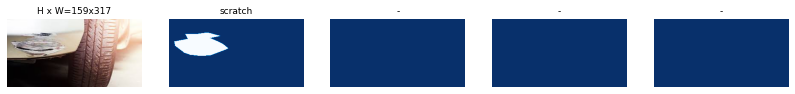

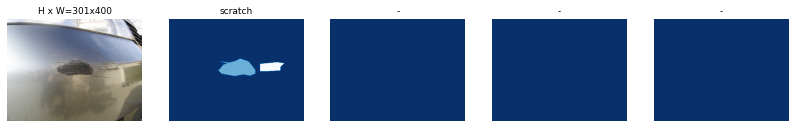

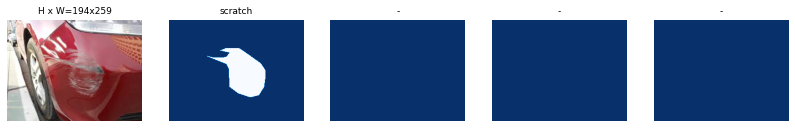

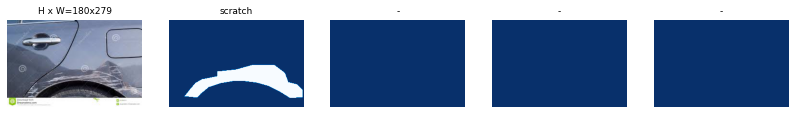

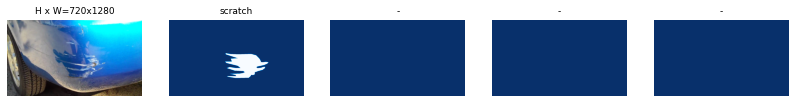

In [0]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 5)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image_id  19 /content/car-damage-detection-using-CNN/images/train/image22.jpg
image                    shape: (168, 300, 3)         min:    2.00000  max:  255.00000  uint8
mask                     shape: (168, 300, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   30.00000  max:  196.00000  int32


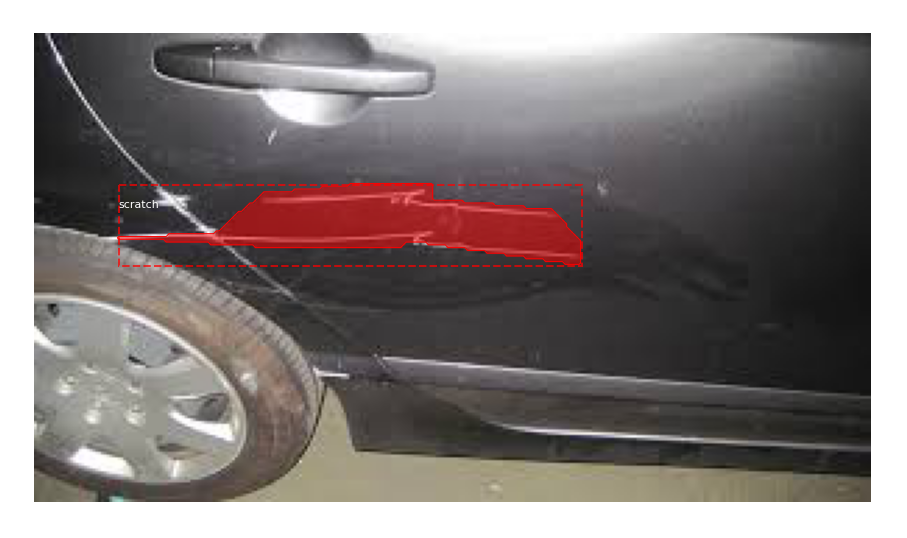

In [0]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [0]:
#Annotation file load
#annotations1 = json.load(open(os.path.join(ROOT_DIR, "via_region_data.json"),encoding="utf8"))
annotations1 = json.load(open(os.path.join("/content/car-damage-detection-using-CNN/images/train/via_region_data.json"),encoding="utf8"))
annotations = list(annotations1.values()) 
annotations = [a for a in annotations if a['regions']]
annotations[0]

{'base64_img_data': '',
 'file_attributes': {},
 'filename': 'image2.jpg',
 'fileref': '',
 'regions': {'0': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [428,
     429,
     480,
     518,
     557,
     577,
     610,
     660,
     642,
     578,
     579,
     585,
     590,
     574,
     580,
     516,
     507,
     474,
     427,
     426,
     412,
     412,
     430,
     470,
     452,
     428],
    'all_points_y': [232,
     216,
     198,
     193,
     212,
     238,
     237,
     242,
     248,
     248,
     260,
     292,
     343,
     409,
     417,
     441,
     443,
     427,
     413,
     381,
     324,
     301,
     288,
     249,
     231,
     232],
    'name': 'polygon'}},
  '1': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [470,
     500,
     578,
     718,
     670,
     594,
     553,
     510,
     469,
     448,
     470],
    'all_points_y': [516, 548, 562, 557, 569, 

In [0]:
annotations[1]['regions']['0']['shape_attributes']
l = []
for d in annotations[1]['regions']['0']['shape_attributes'].values():
    l.append(d)
display('x co-ordinates of the damage:',l[1])    
display('y co-ordinates of the damage:',l[2])

'x co-ordinates of the damage:'

[293, 360, 349, 308, 293]

'y co-ordinates of the damage:'

[303, 330, 314, 302, 303]

In [0]:
class CustomConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "scratch"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + toy

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

config=CustomConfig()

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Create model in inference mode
import tensorflow as tf
#with tf.device(DEVICE):
#model = modellib.MaskRCNN(mode="training", model_dir=MODEL_DIR,config=config)
#model = modellib.MaskRCNN(mode="training", model_dir=MODEL_DIR,config=config)
# load the last best model you trained
# weights_path = model.find_last()[1]
custom_WEIGHTS_PATH = '/content/Mask_RCNN/mask_rcnn_coco.h5'
# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
#model.load_weights(custom_WEIGHTS_PATH, by_name=True)

# Exclude the last layers because they require a matching
# number of classes
#We exclude the last few layers from training for ResNet101. 
#Excluding the last layers is to match the number of classes in the new data set.
#load the weights for COCO
#model.load_weights(custom_WEIGHTS_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
#model.load_weights(custom_WEIGHTS_PATH, by_name=True)

Loading weights  /content/Mask_RCNN/mask_rcnn_coco.h5


In [0]:
CUSTOM_DIR="/content/car-damage-detection-using-CNN/images/"
dataset = CustomDataset()
dataset.load_custom(CUSTOM_DIR,'val')
dataset.prepare()
print('Images: {}\nclasses: {}'.format(len(dataset.image_ids), dataset.class_names))

Images: 6
classes: ['BG', 'scratch']


In [0]:
#visualize.display_weight_stats(model)

In [0]:
dataset_train = CustomDataset()
dataset_train.load_custom(CUSTOM_DIR, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = CustomDataset()
dataset_val.load_custom(CUSTOM_DIR, "val")
dataset_val.prepare()

In [0]:
dataset_train.image_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [0]:
#use this later perhaps!
"""
from mrcnn.utils import compute_ap
#https://github.com/matterport/Mask_RCNN/issues/1839
class EvalImage():
  def __init__(self,dataset,model,cfg):
    self.dataset = dataset
    self.model   = model
    self.cfg     = cfg

 
 
  def evaluate_model(self , len = 50):
    APs = list()
    precisions_dict = {}
    recall_dict     = {}
    for index,image_id in enumerate(self.dataset.image_ids):
      if(index > len):
         break; 
      # load image, bounding boxes and masks for the image id
      image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(self.dataset, self.cfg,image_id, use_mini_mask=False)
      # convert pixel values (e.g. center)
      #scaled_image = modellib.mold_image(image, self.cfg)
      # convert image into one sample
      sample = np.expand_dims(image, 0)
     # print(len(image))
      # make prediction
      yhat = self.model.detect(sample, verbose=1)
      # extract results for first sample
      r = yhat[0]
      # calculate statistics, including AP
      AP, precisions, recalls, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
      precisions_dict[image_id] = np.mean(precisions)
      recall_dict[image_id] = np.mean(recalls)
      # store
      APs.append(AP)

    # calculate the mean AP across all images
    mAP = np.mean(APs)
    return mAP,precisions_dict,recall_dict
    

model_inf = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

config = CustomConfig()
eval = EvalImage(dataset_val,model_inf,config)
eval.evaluate_model()
    
"""

'\nfrom mrcnn.utils import compute_ap\n#https://github.com/matterport/Mask_RCNN/issues/1839\nclass EvalImage():\n  def __init__(self,dataset,model,cfg):\n    self.dataset = dataset\n    self.model   = model\n    self.cfg     = cfg\n\n \n \n  def evaluate_model(self , len = 50):\n    APs = list()\n    precisions_dict = {}\n    recall_dict     = {}\n    for index,image_id in enumerate(self.dataset.image_ids):\n      if(index > len):\n         break; \n      # load image, bounding boxes and masks for the image id\n      image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(self.dataset, self.cfg,image_id, use_mini_mask=False)\n      # convert pixel values (e.g. center)\n      #scaled_image = modellib.mold_image(image, self.cfg)\n      # convert image into one sample\n      sample = np.expand_dims(image, 0)\n     # print(len(image))\n      # make prediction\n      yhat = self.model.detect(sample, verbose=1)\n      # extract results for first sample\n      r = yhat[0]\n 

In [0]:
#https://github.com/matterport/Mask_RCNN/issues/1839
"""
mean_average_precision_callback = modellib.MeanAveragePrecisionCallback(model,
model_inference, dataset_val, calculate_map_at_every_X_epoch=1, verbose=1)
"""
#dont run this.
"""
# *** This training schedule is an example. Update to your needs ***
# Since we're using a very small dataset, and starting from
# COCO trained weights, we don't need to train too long. Also,
# no need to train all layers, just the heads should do it.
print("Training network heads")
model.train(dataset_train,dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=20,
                layers='heads',)
#fine tuning all layers
model.train(dataset_train,dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=20,
                layers='all',custom_callbacks=[mean_average_precision_callback])
"""


'\n# *** This training schedule is an example. Update to your needs ***\n# Since we\'re using a very small dataset, and starting from\n# COCO trained weights, we don\'t need to train too long. Also,\n# no need to train all layers, just the heads should do it.\nprint("Training network heads")\nmodel.train(dataset_train,dataset_val,\n                learning_rate=config.LEARNING_RATE,\n                epochs=20,\n                layers=\'heads\',)\n#fine tuning all layers\nmodel.train(dataset_train,dataset_val,\n                learning_rate=config.LEARNING_RATE,\n                epochs=20,\n                layers=\'all\',custom_callbacks=[mean_average_precision_callback])\n'

In [0]:
#https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/



"""
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = '/content/Mask_RCNN/logs/'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='/content/Mask_RCNN/logs', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         write_images=True)
                         """

'\n!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip\n!unzip ngrok-stable-linux-amd64.zip\n\nLOG_DIR = \'/content/Mask_RCNN/logs/\'\nget_ipython().system_raw(\n    \'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &\'\n    .format(LOG_DIR)\n)\n\nget_ipython().system_raw(\'./ngrok http 6006 &\')\n\n! curl -s http://localhost:4040/api/tunnels | python3 -c     "import sys, json; print(json.load(sys.stdin)[\'tunnels\'][0][\'public_url\'])"\n\nfrom keras.callbacks import TensorBoard\ntbCallBack = TensorBoard(log_dir=\'/content/Mask_RCNN/logs\', histogram_freq=1,\n                         write_graph=True,\n                         write_grads=True,\n                         write_images=True)\n                         '

In [0]:
"""


LOG_DIR = '/content/Mask_RCNN/logs/'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
# Install
! npm install -g localtunnel

# Tunnel port 6006 (TensorBoard assumed running)
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

# Get url
! cat url.txt

!npm i -g npm
"""

"\n\n\nLOG_DIR = '/content/Mask_RCNN/logs/'\nget_ipython().system_raw(\n    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'\n    .format(LOG_DIR)\n)\n# Install\n! npm install -g localtunnel\n\n# Tunnel port 6006 (TensorBoard assumed running)\nget_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')\n\n# Get url\n! cat url.txt\n\n!npm i -g npm\n"

In [0]:
#tf.debugging.set_log_device_placement(True)

#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [0]:
import keras as k
k.__version__

'2.1.0'

In [0]:
%keras_version 2.0.8

UsageError: Line magic function `%keras_version` not found.


In [0]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0
DEVICE = "/GPU:0"

with tf.device(DEVICE):
  #!pip install keras==2.1.0
  #%tensorflow_version 1.13.1
  import tensorflow.compat.v1 as tf

  tf.disable_v2_behavior()
  model = modellib.MaskRCNN(mode="training", model_dir=MODEL_DIR,config=config)
  #model = modellib.MaskRCNN(mode="training", model_dir=MODEL_DIR,config=config)
  # load the last best model you trained
  # weights_path = model.find_last()[1]
  custom_WEIGHTS_PATH = '/content/Mask_RCNN/mask_rcnn_coco.h5'
  # Load weights
  print("Loading weights ", custom_WEIGHTS_PATH)
  #model.load_weights(custom_WEIGHTS_PATH, by_name=True)

  # Exclude the last layers because they require a matching
  # number of classes
  #We exclude the last few layers from training for ResNet101. 
  #Excluding the last layers is to match the number of classes in the new data set.
  #load the weights for COCO
  model.load_weights(custom_WEIGHTS_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
  #model.load_weights(custom_WEIGHTS_PATH, by_name=True)


  # *** This training schedule is an example. Update to your needs ***
  # Since we're using a very small dataset, and starting from
  # COCO trained weights, we don't need to train too long. Also,
  # no need to train all layers, just the heads should do it.
  print("Training network heads")
  model.train(dataset_train,dataset_val,
                  learning_rate=config.LEARNING_RATE,
                  epochs=20, layers='heads')
  #fine tuning all layers
  print("Fine tuning all layers")
  model.train(dataset_train,dataset_val,
                  learning_rate=config.LEARNING_RATE,
                  epochs=20,
                  layers='all')

AttributeError: ignored

In [0]:
#deepSearch
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

find('*.py', '/content/Mask_RCNN')
#https://stackoverflow.com/questions/1724693/find-a-file-in-python

In [0]:
#https://towardsdatascience.com/object-detection-using-mask-r-cnn-on-a-custom-dataset-4f79ab692f6d

from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
%matplotlib inline
from os import listdir
from xml.etree import ElementTree

In [0]:
class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # number of classes (we would normally add +1 for the background)
     # damage + BG
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 131
    
    # Learning rate
    LEARNING_RATE=0.006
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

In [0]:
config = myMaskRCNNConfig()
config.display()

In [0]:
#complex stuff here
class MyDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        
        # Add classes. We have only one class to add.
        self.add_class("dataset", 1, "damage")
        
        # define data locations for images and annotations
        images_dir = dataset_dir + '\\images\\'
        annotations_dir = dataset_dir + '\\annots\\'
        
        # Iterate through all files in the folder to 
        #add class, images and annotaions
        for filename in listdir(images_dir):
            
            # extract image id
            image_id = filename[:-4]
            
            # skip bad images
            if image_id in ['00090']:
                continue
            # skip all images after 150 if we are building the train set
            if is_train and int(image_id) >= 150:
                continue
            # skip all images before 150 if we are building the test/val set
            if not is_train and int(image_id) < 150:
                continue
            
            # setting image file
            img_path = images_dir + filename
            
            # setting annotations file
            ann_path = annotations_dir + image_id + '.xml'
            
            # adding images and annotations to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
# extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height
# load the masks for an image
    """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
     """
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        
        # define anntation  file location
        path = info['annotation']
        
        # load XML
        boxes, w, h = self.extract_boxes(path)
       
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('kangaroo'))
        return masks, asarray(class_ids, dtype='int32')
# load an image reference
     """Return the path of the image."""
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        print(info)
        return info['path']

In [0]:
# prepare train set
train_set = KangarooDataset()
train_set.load_dataset(‘..\\Kangaroo\\kangaroo-master\\kangaroo-master’, is_train=True)
train_set.prepare()
print(‘Train: %d’ % len(train_set.image_ids))
# prepare test/val set
test_set = KangarooDataset()
test_set.load_dataset(‘..\\Kangaroo\\kangaroo-master\\kangaroo-master’, is_train=False)
test_set.prepare()
print(‘Test: %d’ % len(test_set.image_ids))

In [0]:
print("Loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="training", config=config, model_dir='./')

In [0]:
#load the weights for COCO
model.load_weights('.\\Mask_RCNN\\mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

In [0]:
## train heads with higher lr to speedup the learning
model.train(train_set, test_set, learning_rate=2*config.LEARNING_RATE, epochs=5, layers=’heads’)
history = model.keras_model.history.history

In [0]:
import time
model_path = '..\\Kangaroo\\kangaroo-master\\kangaroo-master\\mask_rcnn_'  + '.' + str(time.time()) + '.h5'
model.keras_model.save_weights(model_path)

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#Loading the model in the inference mode
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
# loading the trained weights o the custom dataset
model.load_weights(model_path, by_name=True)
img = load_img("..\\Kangaroo\\kangaroo-master\\kangaroo-master\\images\\00042.jpg")
img = img_to_array(img)
# detecting objects in the image
result= model.detect([img])

In [0]:
image_id = 20
image, image_meta, gt_class_id, gt_bbox, gt_mask =    modellib.load_image_gt(test_set, config, image_id, use_mini_mask=False)
info = test_set.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       test_set.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)
# Display results

r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            test_set.class_names, r['scores'], 
                            title="Predictions")